In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boont\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Q1

In [3]:
df = pd.read_csv("Restaurant_Reviews.tsv", delimiter = "\t", quoting = 3) 

In [4]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## Q2

In [5]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [6]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
df.sample(10)

,Review,Liked
795,So good I am going to have to review this plac...,1
235,"If it were possible to give them zero stars, t...",0
19,did not like at all.,0
581,Over rated.,0
920,"Needless to say, I won't be going back anytime...",0
809,The first time I ever came here I had an amazi...,1
772,"the food is not tasty at all, not to say its ""...",0
687,"The decor is nice, and the piano music soundtr...",1
177,"The atmosphere is modern and hip, while mainta...",1
350,We sat another ten minutes and finally gave up...,0


## Q3

In [9]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Q4

<AxesSubplot:xlabel='Liked', ylabel='count'>

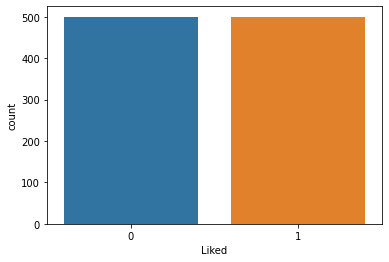

In [12]:
sns.countplot(df['Liked'])

## Q5

In [14]:
df['Length']=[len(x) for x in df['Review']]

In [16]:
df

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


## Q6

(array([19., 23., 68., 42., 45., 33., 62., 37., 48., 43., 41., 56., 29.,
        39., 43., 29., 23., 33., 20., 14., 39., 13., 27., 17., 15., 19.,
        12., 13., 11., 10., 12., 17.,  6.,  8.,  3.,  9.,  4.,  6.,  1.,
        11.]),
 array([ 11.  ,  14.45,  17.9 ,  21.35,  24.8 ,  28.25,  31.7 ,  35.15,
         38.6 ,  42.05,  45.5 ,  48.95,  52.4 ,  55.85,  59.3 ,  62.75,
         66.2 ,  69.65,  73.1 ,  76.55,  80.  ,  83.45,  86.9 ,  90.35,
         93.8 ,  97.25, 100.7 , 104.15, 107.6 , 111.05, 114.5 , 117.95,
        121.4 , 124.85, 128.3 , 131.75, 135.2 , 138.65, 142.1 , 145.55,
        149.  ]),
 <BarContainer object of 40 artists>)

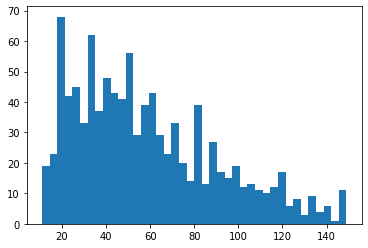

In [20]:
plt.hist(df['Length'],bins=40)

## Q7

(array([12.,  5., 34., 24., 21., 18., 30., 31., 15., 30., 22., 25., 16.,
        15., 32., 10., 18., 13., 14.,  7., 13., 12.,  9., 10.,  6.,  8.,
         5.,  5.,  7.,  2., 10.,  3.,  4.,  3.,  0.,  1.,  2.,  3.,  0.,
         5.]),
 array([ 11.   ,  14.425,  17.85 ,  21.275,  24.7  ,  28.125,  31.55 ,
         34.975,  38.4  ,  41.825,  45.25 ,  48.675,  52.1  ,  55.525,
         58.95 ,  62.375,  65.8  ,  69.225,  72.65 ,  76.075,  79.5  ,
         82.925,  86.35 ,  89.775,  93.2  ,  96.625, 100.05 , 103.475,
        106.9  , 110.325, 113.75 , 117.175, 120.6  , 124.025, 127.45 ,
        130.875, 134.3  , 137.725, 141.15 , 144.575, 148.   ]),
 <BarContainer object of 40 artists>)

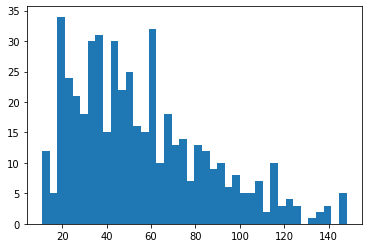

In [21]:
plt.hist(df[df['Liked']==1]['Length'],bins=40)

(array([ 7., 18., 34., 18., 24., 15., 22., 16., 28., 18., 19., 31., 13.,
        19., 16., 14., 10., 16., 10.,  7., 19.,  8., 14., 11.,  8., 12.,
         5.,  8.,  5.,  6.,  5., 11.,  5.,  5.,  2.,  8.,  2.,  4.,  1.,
         6.]),
 array([ 11.  ,  14.45,  17.9 ,  21.35,  24.8 ,  28.25,  31.7 ,  35.15,
         38.6 ,  42.05,  45.5 ,  48.95,  52.4 ,  55.85,  59.3 ,  62.75,
         66.2 ,  69.65,  73.1 ,  76.55,  80.  ,  83.45,  86.9 ,  90.35,
         93.8 ,  97.25, 100.7 , 104.15, 107.6 , 111.05, 114.5 , 117.95,
        121.4 , 124.85, 128.3 , 131.75, 135.2 , 138.65, 142.1 , 145.55,
        149.  ]),
 <BarContainer object of 40 artists>)

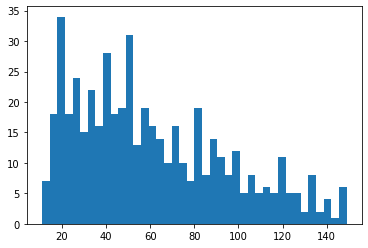

In [22]:
plt.hist(df[df['Liked']==0]['Length'],bins=40)

## Q8

In [23]:
max_index = df['Length'].idxmax()
max_index

985

In [25]:
print(df['Review'].iloc[985])

The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


## Q9

In [26]:
df_like=df[df['Liked']==1]
df_like

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [27]:
df_dislike=df[df['Liked']==0]
df_dislike

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [28]:
df_like['Length'].mean()

55.88

In [29]:
df_dislike['Length'].mean()

60.75

## Q10

In [31]:
for x in df_like['Review'].head(10):
    print(x)

Wow... Loved this place.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
The selection on the menu was great and so were the prices.
The fries were great too.
A great touch.
Service was very prompt.
I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
Highly recommended.
The food, amazing.
Service is also cute.


In [32]:
for x in df_dislike['Review'].head(10):
    print(x)

Crust is not good.
Not tasty and the texture was just nasty.
Now I am getting angry and I want my damn pho.
Honeslty it didn't taste THAT fresh.)
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
Would not go back.
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
I was disgusted because I was pretty sure that was human hair.
I was shocked because no signs indicate cash only.
Waitress was a little slow in service.


## Q11

In [33]:
def text_process(mess):
    no_punc=[x for x in mess if x not in string.punctuation]
    
    no_punc=''.join(no_punc)
    
    text=[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    
    return text

## Q12

In [34]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(df['Review'])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001EFC7B6B8B8>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [35]:
bow_review=bow_transformer.transform(df['Review'])


## Q13

In [36]:
len(bow_transformer.vocabulary_)

2159

## Q14-Q15

In [38]:
print('Shape of Sparse Matrix', bow_review.shape)
print('None Zero', bow_review.nnz)
print('% of Sparsity:',bow_review.nnz*100/(bow_review.shape[0]*bow_review.shape[1]))

Shape of Sparse Matrix (1000, 2159)
None Zero 5606
% of Sparsity: 0.25965724872626217


## Q16 

In [39]:
tfidf_transformer=TfidfTransformer().fit(bow_review)
tfidf_transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [40]:
tfidf_review=tfidf_transformer.transform(bow_review)
tfidf_review

<1000x2159 sparse matrix of type '<class 'numpy.float64'>'
	with 5606 stored elements in Compressed Sparse Row format>

## Q17

In [45]:
nb=MultinomialNB()

In [46]:
y_17=df['Liked']
x_17=tfidf_review

In [47]:
like_detection=nb.fit(x_17,y_17)
like_detection

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Q18

In [48]:
predicted_17 = like_detection.predict(x_17)
predicted_17

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [49]:
confusion_matrix(y_17,predicted_17)

array([[486,  14],
       [ 21, 479]], dtype=int64)

## Q19

In [50]:
acc_17   =accuracy_score(y_17,predicted_17)
f1_17    =f1_score(y_17,predicted_17)
pre_17   =precision_score(y_17,predicted_17)
recall_17=recall_score(y_17,predicted_17)

In [51]:
print(acc_17)
print(f1_17)
print(pre_17)
print(recall_17)

0.965
0.9647532729103725
0.9716024340770791
0.958


## Q20

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [57]:
like_detection_gnb=gnb.fit(x_17.toarray(),y_17)
like_detection_gnb

GaussianNB(priors=None, var_smoothing=1e-09)

## Q21

In [58]:
predicted_21 = like_detection_gnb.predict(x_17.toarray())
predicted_21

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [59]:
confusion_matrix(y_17,predicted_21)

array([[456,  44],
       [  0, 500]], dtype=int64)

## Q22

In [60]:
acc_21   =accuracy_score(y_17,predicted_21)
f1_21    =f1_score(y_17,predicted_21)
pre_21   =precision_score(y_17,predicted_21)
recall_21=recall_score(y_17,predicted_21)

In [61]:
print(acc_21)
print(f1_21)
print(pre_21)
print(recall_21)

0.956
0.9578544061302682
0.9191176470588235
1.0


## Q23

In [62]:
x_train,x_test,y_train,y_test=train_test_split(df['Review'],df['Liked'],test_size=0.2)

## Q24

In [63]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB())
])

## Q25

In [64]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001EFC7B6B8B8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [65]:
predicted_25 = pipeline.predict(x_test)

In [66]:
confusion_matrix(y_test,predicted_25)

array([[73, 32],
       [18, 77]], dtype=int64)

In [67]:
print(accuracy_score(y_test,predicted_25))
print(f1_score(y_test,predicted_25))
print(precision_score(y_test,predicted_25))
print(recall_score(y_test,predicted_25))

0.75
0.7549019607843137
0.7064220183486238
0.8105263157894737
